In [59]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

img_width, img_height = 150, 150
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 37, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 88800)             0         
__________

In [61]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    './data/test/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False)

#test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=2)
# Get most likely class


Found 216 images belonging to 6 classes.


In [62]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 0, 1, 3, 3, 3, 3, 4, 1, 1, 1, 3, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3,
       1, 0, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 2, 3, 4, 3, 2, 3, 1, 3, 2, 3,
       3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 0, 3, 2, 0, 3, 2,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 4, 0, 3, 3, 3, 1, 1,
       4, 1, 1, 1, 0, 3, 4, 4, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3])

In [65]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [66]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [67]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   


             precision    recall  f1-score   support

      trash       0.73      0.69      0.71        55
      metal       0.58      0.37      0.45        41
    plastic       1.00      0.20      0.34        44
      glass       0.24      1.00      0.38        29
      paper       0.67      0.14      0.23        29
  cardboard       0.00      0.00      0.00        18

avg / total       0.62      0.44      0.42       216



In [68]:
cm = metrics.confusion_matrix(true_classes,predicted_classes)
print(cm)

[[38  1  0 16  0  0]
 [ 3 15  0 22  1  0]
 [ 5  3  9 26  1  0]
 [ 0  0  0 29  0  0]
 [ 5  7  0 13  4  0]
 [ 1  0  0 17  0  0]]


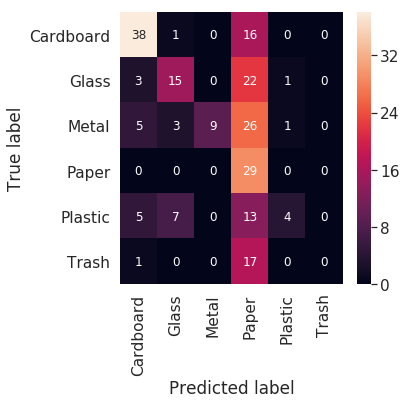

In [75]:
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt

labels = ['Cardboard', 'Glass','Metal','Paper','Plastic','Trash' ]
df_cm = pd.DataFrame(cm, labels,
                  labels)
plt.figure(figsize = (5,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
def predict(file):
    x = load_img(file, target_size=(img_width,img_height))
    x = img_to_array(x)
    x = x/255.
    x = np.expand_dims(x, axis=0)
    pred=[]
    prediction = model.predict_proba(x)
    pred.append(prediction)
    answer = np.argmax(prediction)
    if answer == 0:
        print("Label: Cardboard")
    elif answer == 1:
        print("Labels: Glass")
    elif answer == 2:
        print("Label: Metal")
    elif answer == 3:
        print("Label: Paper")
    elif answer == 4:
        print("Label: Plastic")
    elif answer ==5:
        print ("Label: Trash")
    return answer

In [77]:
test_path = 'data/test'
#Walk the directory for every image
result = []
for i, ret in enumerate(os.walk(test_path)):
    for i, filename in enumerate(ret[2]):
        if filename.startswith("."):
            continue
            
        print(ret[0] + '/' + filename)
        result = predict(ret[0] + '/' + filename)
        print(" ")
        

data/test/cardboard/cardboard161.jpg
Label: Cardboard
 
data/test/cardboard/cardboard178.jpg
Label: Cardboard
 
data/test/cardboard/1.jpeg
Label: Cardboard
 
data/test/cardboard/123.jpg
Label: Metal
 
data/test/cardboard/2.jpg
Label: Paper
 
data/test/cardboard/71sAl5+5klL._SL1250_.jpg
Label: Paper
 
data/test/cardboard/cardboard148.jpg
Label: Cardboard
 
data/test/cardboard/cardboard149.jpg
Label: Cardboard
 
data/test/cardboard/cardboard150.jpg
Label: Plastic
 
data/test/cardboard/cardboard151.jpg
Label: Cardboard
 
data/test/cardboard/cardboard152.jpg
Label: Cardboard
 
data/test/cardboard/cardboard153.jpg
Label: Cardboard
 
data/test/cardboard/cardboard154.jpg
Label: Cardboard
 
data/test/cardboard/cardboard155.jpg
Label: Cardboard
 
data/test/cardboard/cardboard156.jpg
Label: Cardboard
 
data/test/cardboard/cardboard157.jpg
Label: Cardboard
 
data/test/cardboard/cardboard158.jpg
Label: Cardboard
 
data/test/cardboard/cardboard159.jpg
Label: Cardboard
 
data/test/cardboard/cardboar

Label: Plastic
 
data/test/plastic/plastic66.jpg
Label: Plastic
 
data/test/plastic/plastic67.jpg
Label: Plastic
 
data/test/plastic/plastic68.jpg
Label: Plastic
 
data/test/plastic/plastic69.jpg
Label: Plastic
 
data/test/plastic/plastic70.jpg
Label: Plastic
 
data/test/plastic/plastic71.jpg
Label: Plastic
 
data/test/plastic/plastic72.jpg
Label: Plastic
 
data/test/plastic/plastic73.jpg
Label: Plastic
 
data/test/plastic/plastic74.jpg
Label: Plastic
 
data/test/plastic/plastic75.jpg
Label: Plastic
 
data/test/plastic/plastic76.jpg
Label: Plastic
 
data/test/plastic/plastic77.jpg
Label: Plastic
 
data/test/plastic/plastic78.jpg
Label: Plastic
 
data/test/plastic/plastic79.jpg
Label: Trash
 
data/test/plastic/plastic80.jpg
Label: Plastic
 
data/test/plastic/plastic81.jpg
Label: Plastic
 
data/test/plastic/plastic82.jpg
Label: Plastic
 
data/test/plastic/plastic83.jpg
Label: Plastic
 
data/test/plastic/plastic84.jpg
Label: Plastic
 
data/test/plastic/plastic85.jpg
Label: Plastic
 
data/